In [ ]:
%pip install -i https://test.pypi.org/simple/ VASA==0.0.4

In [1]:
import os
import sys
import geopandas as gpd
import pandas as pd
import numpy as np

sys.path.append(os.path.abspath(os.path.join(os.pardir)))
from VASA import VASA

/home/alex/Desktop/github/VASA/myenv/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
# CBG Map of California
counties_map = gpd.GeoDataFrame \
    .from_features(gpd.read_file("../data/ca_cbg")) \
    .set_crs(epsg=4326) \
    .to_crs("+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs")

counties_map = counties_map[counties_map.ALAND > 0]

In [3]:
#Lake Fire 2019 Data
fire2019 = pd.read_csv("../data/lakefire2019_data.csv")
fire2019.origin_census_block_group = "0" + fire2019.origin_census_block_group.astype(str)

In [4]:
# unique_tracts = np.unique([g[:8] for g in fire2019.origin_census_block_group])
# tract_map = counties_map[[(cbg[:8] in unique_tracts) for cbg in counties_map.GEOID]]

In [4]:
v = VASA(
    df=fire2019[["origin_census_block_group", "date_range_start", "distance_traveled_from_home"]],
    gdf=counties_map,
    group_summary=lambda g: g[:5], # county level
    df_group_col="origin_census_block_group",
    gdf_group_col="GEOID",
    date_col="date_range_start",
    temp_res="week",
    date_format="%Y-%m-%d %H:%M:%S"
)

In [5]:
del fire2019

In [6]:
v.filter_group()

In [7]:
v.group()

In [8]:
v.fill_missing()

In [9]:
v.lisa(k=2, type="union")

/home/alex/Desktop/github/VASA/myenv/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 66 disconnected components.
  warnings.warn(message)


('WARNING: ', 1796, ' is an island (no neighbors)')
('WARNING: ', 5276, ' is an island (no neighbors)')
('WARNING: ', 5962, ' is an island (no neighbors)')
('WARNING: ', 9872, ' is an island (no neighbors)')


/home/alex/Desktop/github/VASA/myenv/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 4 islands with ids: 1796, 5276, 5962, 9872.
  warnings.warn(message)
/home/alex/Desktop/github/VASA/myenv/lib/python3.8/site-packages/esda/moran.py:1054: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/home/alex/Desktop/github/VASA/myenv/lib/python3.8/site-packages/esda/moran.py:1054: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/home/alex/Desktop/github/VASA/myenv/lib/python3.8/site-packages/esda/moran.py:1054: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/home/alex/Desktop/github/VASA/myenv/lib/python3.8/site-packages/esda/moran.py:1054: RuntimeWarning: invalid value encountered in true_divi

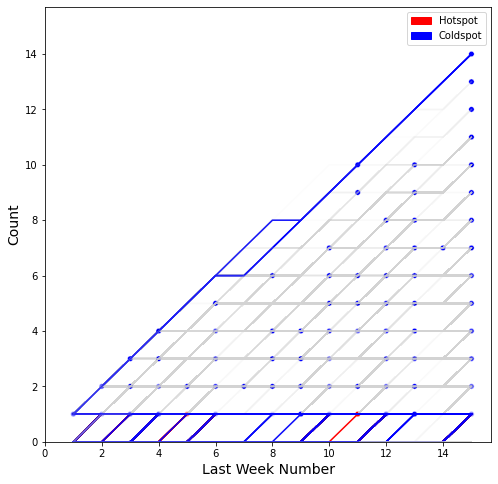

In [67]:
# from VASA.scatter import Scatter
sc = Scatter(v)
sc.plot(highlight = "06037")
# sc.plot(highlight = "")

In [12]:
from VASA.static_choropleth import StackedChoropleth

In [65]:
stcked = StackedChoropleth(v, os.getcwd())
stcked.plot_count()

![](count/distance_traveled_from_home.png)

In [14]:
stcked = StackedChoropleth(v, os.getcwd())
stcked.plot_recent()

![](recent/distance_traveled_from_home.png)

In [ ]:
stcked = StackedChoropleth(v, os.getcwd())
stcked.plot_both()

![](combined/distance_traveled_from_home.png)

In [ ]:
#from VASA.stripplot import Strip

# This is trying to merge with the state names csv, which doesn't make sense for this

st = Strip(v)

def group_id(f):
    return int(f[:8])

st.plot(group_id)